In [3]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
# 1/ Use the appropriate pandas methods to get the info on the data and describe it.
# 2/ List the column names in the dataset.
# 3/ What is the most ordered item? How many exactly were ordered?
# 4/ How much revenue did this chipotle make? 
# 5/ How many orders were placed at this chipotle?
# 6/ How many items cost more than $10?
# 7/ List the name of all unique items in the dataset.
# 8/ Create a histogram of the top 5 items sold.
# 9/ Create a pie chart showing the number of times each item was order.
# 10/ Create a scatter plot showing how many items were order based on the price of the item.
# Your team can come up with its own custom question to answer and visualize!


In [ ]:
# Question 1

In [8]:
chipotle_data.dtypes # describing different information about the dataframe

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [6]:
chipotle_data.info() # get the info of the chipotle data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
chipotle_data.describe() # describe the chipotle data

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [10]:
# Question 2

In [11]:
chipotle_data.columns # print out column names

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [12]:
# Question 3

In [36]:
chipotle_data.groupby('item_name').sum().sort_values(by='quantity', ascending = False) # Group the number of items in descending order

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351
Chips,208004,230
Steak Bowl,193752,221
Bottled Water,175944,211
Chips and Fresh Tomato Salsa,100419,130


In [ ]:
# Answer: Most ordered item is Chicken Bowl, exactly 761

In [37]:
# Question 4

In [9]:
rev = 0
for index, row in chipotle_data.iterrows():
    convert_price = float(row['item_price'].replace("$","")) # remove the '$' sign and convert item's price to float type
    each_rev = row['quantity'] * convert_price
    rev += each_rev
rev

39237.020000000055

In [7]:
# Question 5

In [9]:
order_number = chipotle_data['order_id'].nunique() # Count the number of unique orders
order_number

1834

In [10]:
# Question 6

In [11]:
expensive_items = 0
for index, row in chipotle_data.iterrows():
    convert_price = float(row['item_price'].replace("$","")) # remove the '$' sign and convert item's price to float type
    if convert_price > 10:
        expensive_items += 1
expensive_items

1130

In [12]:
# Question 7

In [13]:
unique_item_names = chipotle_data['item_name'].unique() # Extract unique items in item_name
for item_name in unique_item_names:
    print(item_name)

Chips and Fresh Tomato Salsa
Izze
Nantucket Nectar
Chips and Tomatillo-Green Chili Salsa
Chicken Bowl
Side of Chips
Steak Burrito
Steak Soft Tacos
Chips and Guacamole
Chicken Crispy Tacos
Chicken Soft Tacos
Chicken Burrito
Canned Soda
Barbacoa Burrito
Carnitas Burrito
Carnitas Bowl
Bottled Water
Chips and Tomatillo Green Chili Salsa
Barbacoa Bowl
Chips
Chicken Salad Bowl
Steak Bowl
Barbacoa Soft Tacos
Veggie Burrito
Veggie Bowl
Steak Crispy Tacos
Chips and Tomatillo Red Chili Salsa
Barbacoa Crispy Tacos
Veggie Salad Bowl
Chips and Roasted Chili-Corn Salsa
Chips and Roasted Chili Corn Salsa
Carnitas Soft Tacos
Chicken Salad
Canned Soft Drink
Steak Salad Bowl
6 Pack Soft Drink
Chips and Tomatillo-Red Chili Salsa
Bowl
Burrito
Crispy Tacos
Carnitas Crispy Tacos
Steak Salad
Chips and Mild Fresh Tomato Salsa
Veggie Soft Tacos
Carnitas Salad Bowl
Barbacoa Salad Bowl
Salad
Veggie Crispy Tacos
Veggie Salad
Carnitas Salad


In [14]:
# Question 8

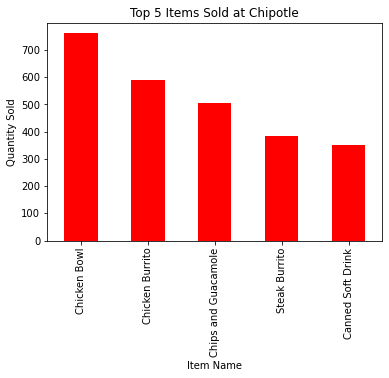

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

item_sales = chipotle_data.groupby('item_name')['quantity'].sum()
top_5_items = item_sales.sort_values(ascending=False).head(5)
top_5_items.plot(kind='bar', color='red')
plt.title('Top 5 Items Sold at Chipotle')
plt.xlabel('Item Name')
plt.ylabel('Quantity Sold')
plt.show()

In [5]:
# Question 9

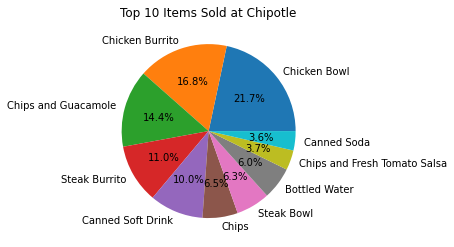

In [23]:
top_10_items = item_sales.sort_values(ascending=False).head(10)
plt.title('Top 10 Items Sold at Chipotle')
plt.pie(top_10_items, labels = top_10_items.index, autopct='%1.1f%%')
plt.show()

In [9]:
# Question 10

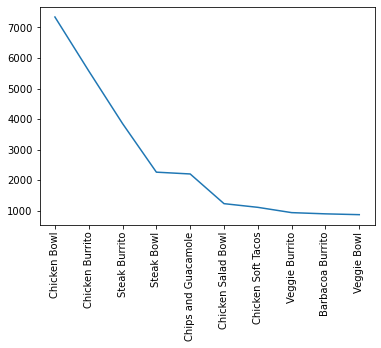

In [54]:
convert_price = []

for index, row in chipotle_data.iterrows():
    convert_price.append(float(row['item_price'].replace("$","")))  # remove the '$' sign and convert item's price to float type

chipotle_data["Convert Price"] = convert_price
item_sales = chipotle_data.groupby('item_name')['Convert Price'].sum()
top_10 = item_sales.sort_values(ascending=False).head(10)
plt.xticks(rotation = 'vertical')
plt.plot(top_10)
plt.show()